# **Regresión Lineal con Keras usando Dataset para Predicción de Cáncer de Mama**
**Conjunto de datos de Wisconsin (diagnóstico) sobre el cáncer de mama.**
Link del Dataset en Kaggle:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Las columnas en el archivo CSV del Dataset son:
1.   ID
2.   Diagnóstico (B = Benigno, M = Maligno)
3.   Radio medio.
4.   Textura.
5.   Perímetro.
6.   Área.
7.   Suavidad.
8.   Compacidad.
9.   Concavidad.
10.   Puntos Cóncavos.
11.   Simetría.
12.   Dimensión Fractal.








# **Preparamos el entorno**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Seleccionamos Tensorflow 2.0
try:
  # El comando %tensorflow_version solo existe en Colaboratory. Es un MAGIC COMMAND.
  %tensorflow_version 2.x
except Exception:
  pass
from tensorflow import keras
from tensorflow.keras import layers


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# **Lectura y Preparación de los Datos**

*Referencia de Pandas*
*   .read_csv() (Lee un archivo csv y carga los datos en un dataframe)
*   .head() (Muestra las 5 primeras filas de un dataframe)
*   .tail() (Muestra las 5 últimas filas de un dataframe)
*   .drop() (Corta filas o columnas del dataframe)
*   .describe() (Devuelve estadísticas del dataframe)





In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clasificador Bayesiano/data.csv", header = 0)

In [4]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data_frame.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Removemos la primera y ultima columna**

In [6]:
data_frame.drop('id', axis=1, inplace=True)
data_frame.drop('Unnamed: 32', axis=1, inplace=True)

**Cambiamos la columna diagnóstico, 0 = B (Benigno), 1 = M (Maligno)**

In [7]:
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M':1,'B':0})

**Visualización del Dataset y Estadísticas**

In [8]:
print(data_frame)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [9]:
data_frame.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Análisis del Dataset**

**Seleccionamos las 10 características que corresponden a la media para realizar una exploración de los datos**

In [10]:
features=list(data_frame.columns[1:11])

**Dividimos el Dataframe según el diagnóstico**

In [11]:
mask = data_frame['diagnosis'] == 1
data_frame_M = data_frame[mask]
data_frame_B = data_frame[~mask]

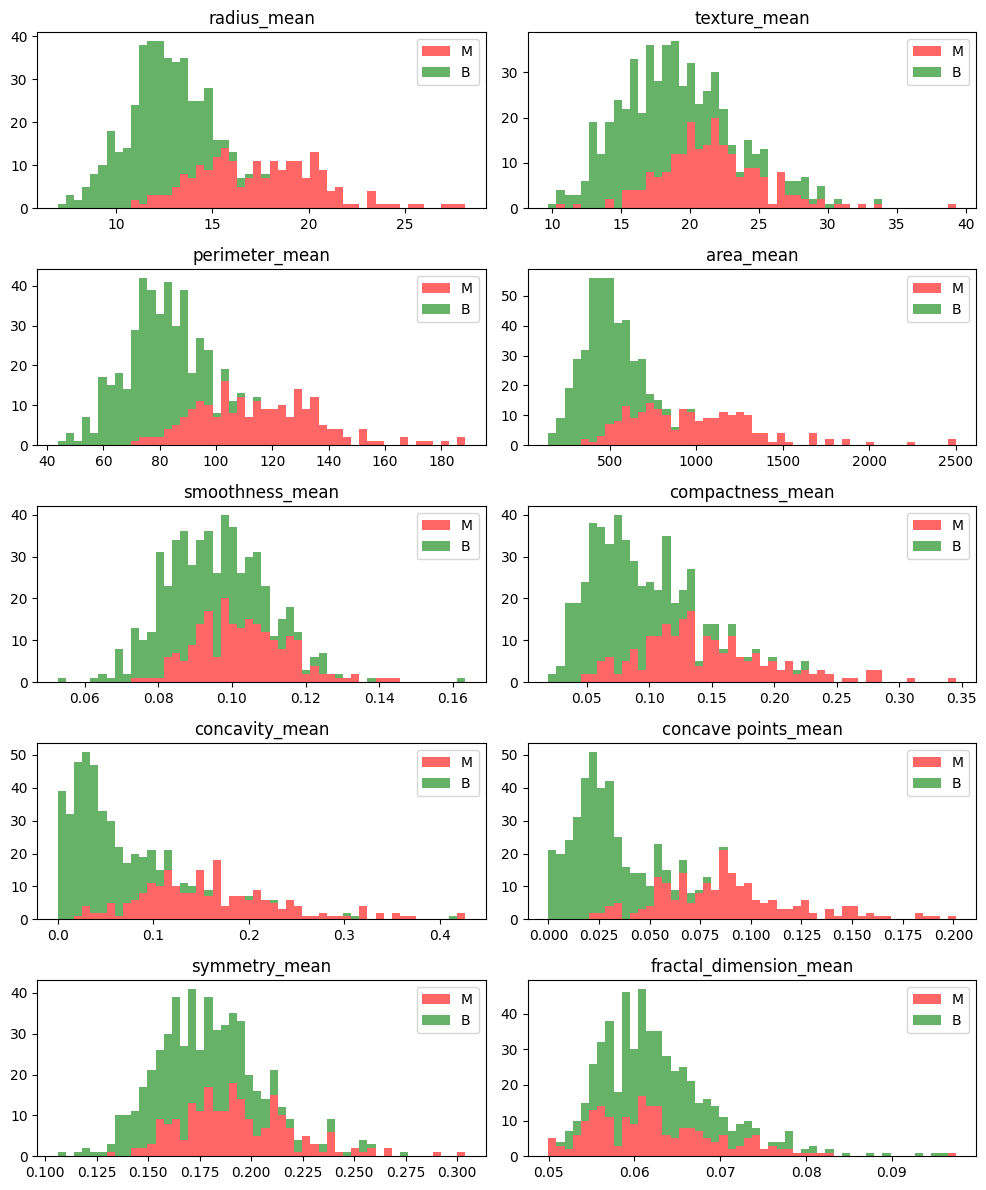

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.hist([data_frame_M[features[idx]],data_frame_B[features[idx]]], bins=50, alpha=0.6, stacked=True, label=['M','B'],color=['r','g'])
  ax.legend(loc='upper right')
  ax.set_title(features[idx])
plt.tight_layout()
plt.show()

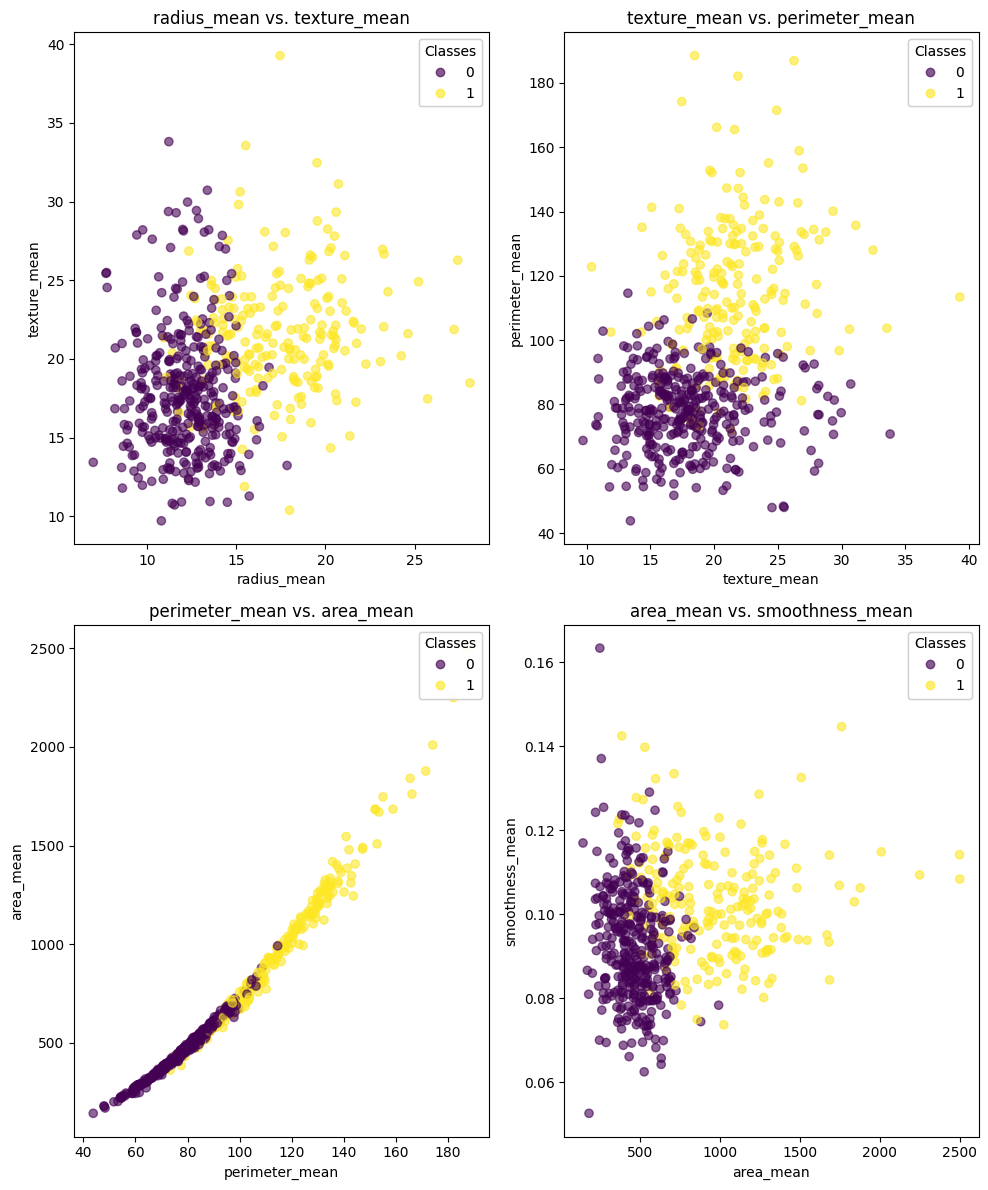

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  scatter = ax.scatter(data_frame[features[idx]], data_frame[features[idx+1]], c=data_frame['diagnosis'], alpha=0.6, label=['Color 1', 'Color 2'])
  ax.set_xlabel(features[idx])
  ax.set_ylabel(features[idx+1])
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.set_title(features[idx]+' vs. '+features[idx+1])
plt.tight_layout()
plt.show()

**Balance del Conjunto de Datos**

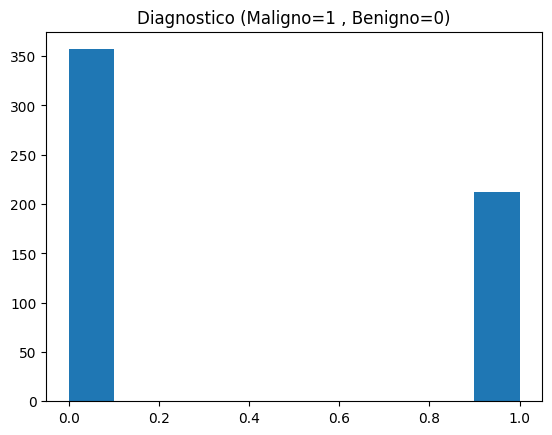

In [14]:
plt.figure().set_facecolor('w')
plt.hist(data_frame['diagnosis'])
plt.title('Diagnostico (Maligno=1 , Benigno=0)')
plt.show()

# **Preparación de los Datos de Entrenamiento y Test**

Seleccionamos las características que usaremos como entradas (X) y la salida esperada (y).

In [15]:
X = data_frame[['radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean']]
y = data_frame['diagnosis']

**Dividimos el Dataset - 70% Train 30% Test**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Visualizamos como quedaron los Datasets para Entrenamiento y Test.**

In [17]:
print(X_train, y_train)
print(X_test, y_test)

     radius_mean  area_mean  perimeter_mean  concavity_mean  \
283        16.24      805.1          108.80         0.19480   
404        12.34      469.1           78.29         0.02109   
512        13.40      556.7           88.64         0.14450   
532        13.68      575.5           87.76         0.01752   
263        15.61      758.6          100.00         0.04209   
..           ...        ...             ...             ...   
530        11.75      422.9           75.89         0.05282   
158        12.06      448.6           76.84         0.01972   
32         17.02      899.3          112.80         0.24170   
74         12.31      470.9           79.19         0.03372   
288        11.26      394.1           73.72         0.09274   

     concave points_mean  
283              0.09052  
404              0.02054  
512              0.08172  
532              0.01880  
263              0.02847  
..                   ...  
530              0.04440  
158              0.01963  


# **Implementación del modelo**

In [18]:
model = keras.Sequential()
model.add(layers.Dense(1, input_dim = 5, kernel_initializer='zeros'))
model.add(layers.Activation('sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(0.00005), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
fit_history = model.fit(X_train.values, y_train.values, validation_data=(X_test, y_test), epochs = 150, batch_size=199)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.6600 - loss: 0.6938 - val_accuracy: 0.5731 - val_loss: 0.6956
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6667 - loss: 0.6923 - val_accuracy: 0.5731 - val_loss: 0.6926
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7136 - loss: 0.6916 - val_accuracy: 0.4854 - val_loss: 0.6882
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3853 - loss: 0.6905 - val_accuracy: 0.4269 - val_loss: 0.6841
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3451 - loss: 0.6896 - val_accuracy: 0.4269 - val_loss: 0.6809
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3400 - loss: 0.6892 - val_accuracy: 0.4269 - val_loss: 0.6787
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3501 - loss: 0.6880 - val_accuracy: 0.4269 - val_loss: 0.6766
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3467 - loss: 0.6868 - val_accuracy: 0.4269 - val_loss

# **Gráficas de Precisión y Perdida**

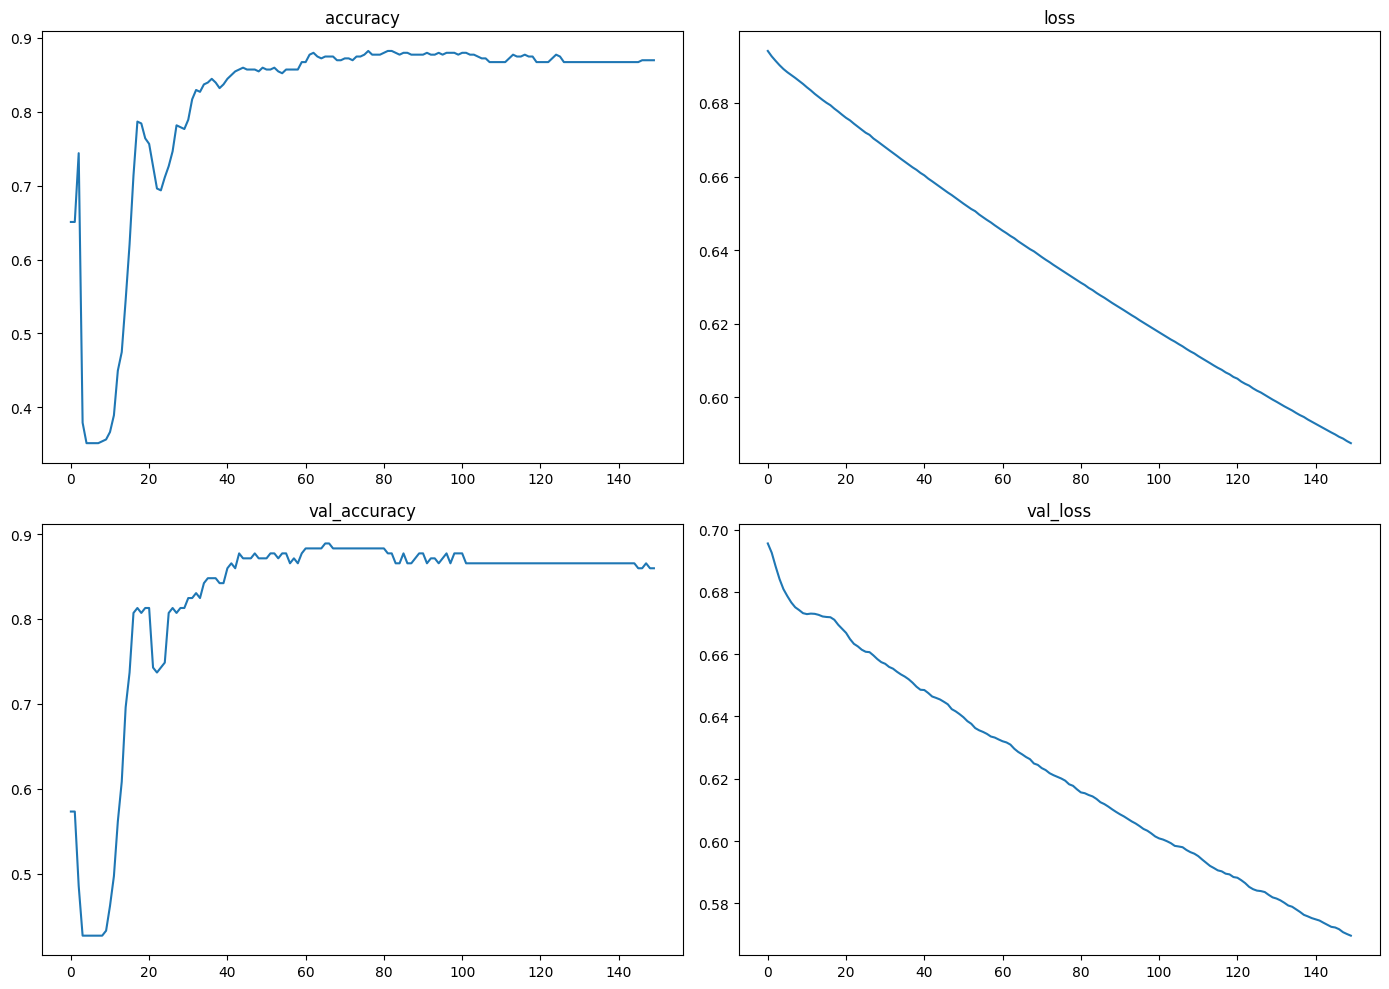

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.ravel()
outputs = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.plot(fit_history.history[outputs[idx]])
  ax.set_title(outputs[idx])
plt.tight_layout()
plt.show()

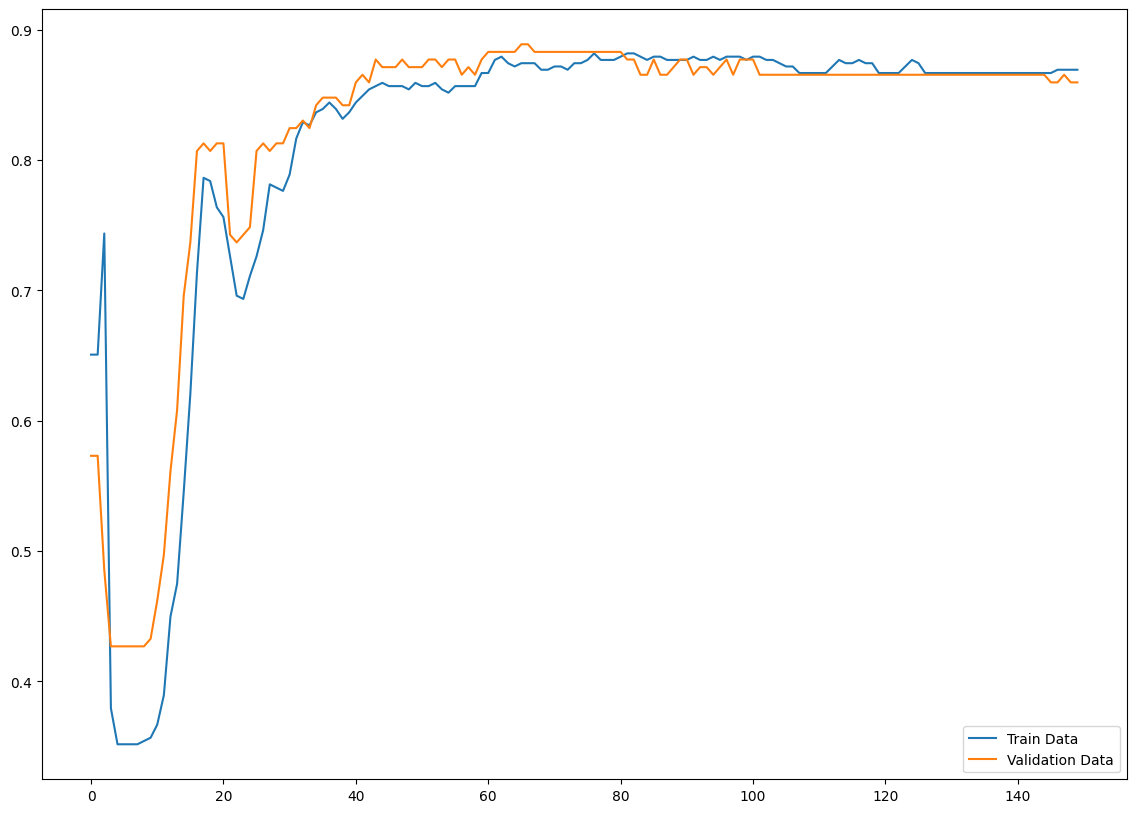

In [21]:
plt.figure(figsize=(14,10), facecolor='w')
plt.plot(fit_history.history['accuracy'], label='Train Data')
plt.plot(fit_history.history['val_accuracy'], label='Validation Data')
plt.legend()
plt.legend(loc='lower right')

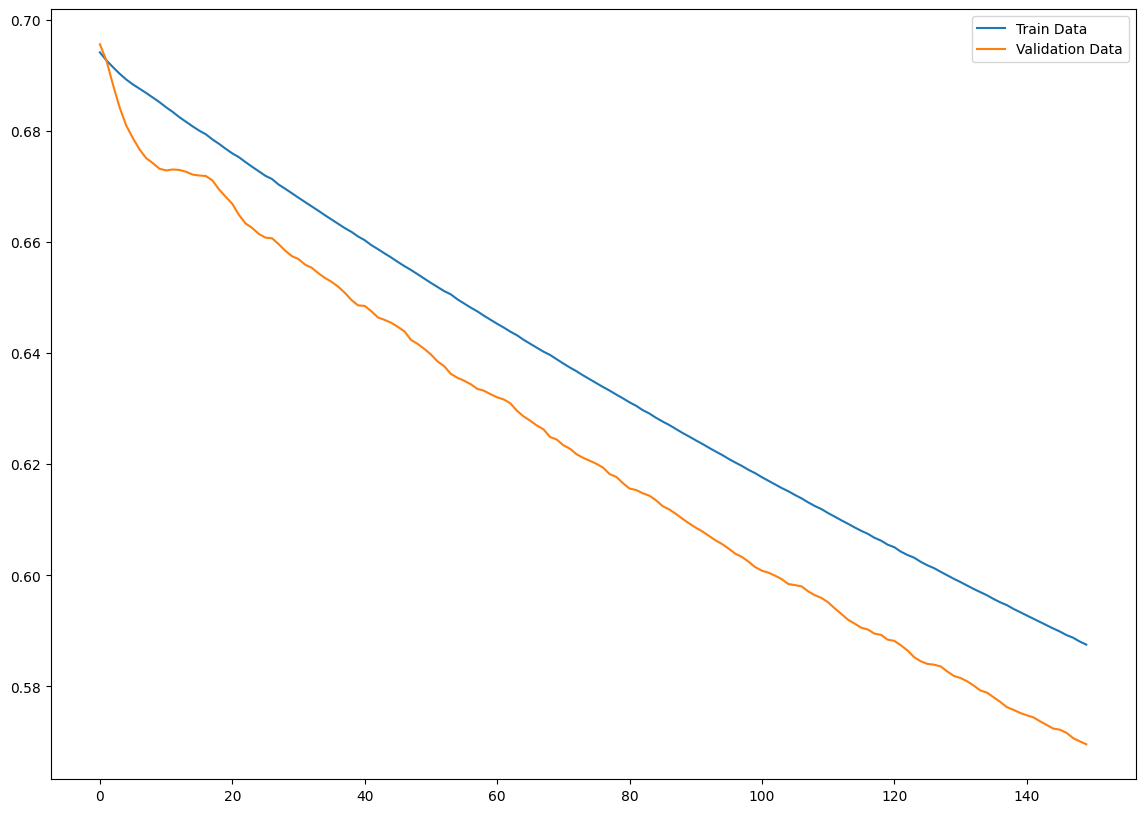

In [29]:
plt.figure(figsize=(14,10))
plt.plot(fit_history.history['loss'], label='Train Data')
plt.plot(fit_history.history['val_loss'], label='Validation Data')
plt.legend()
plt.legend(loc='upper right')

# **Evaluamos el modelo con los conjuntos de Datos de Entrenamiento y Test**

In [31]:
model.evaluate(X_train, y_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.5872 


[0.5870893597602844, 0.8693467378616333]

In [32]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.5758 


[0.5695890784263611, 0.859649121761322]